In [1]:
# Reading in the initial data

import pandas as pd

weather = pd.read_csv("local_weather.csv", index_col="DATE")

In [3]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [6]:
core_elements = weather[['PRCP','SNOW','SNWD','TMAX','TMIN']].copy()
core_elements.columns = ['precipitation','snow','snow_depth','max_temp','min_temp']

core_elements

,precipitation,snow,snow_depth,max_temp,min_temp
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2022-01-24,0.0,NaN,NaN,60.0,39.0
2022-01-25,0.0,NaN,NaN,57.0,43.0
2022-01-26,0.0,NaN,NaN,57.0,41.0


In [8]:
core_elements.isnull().sum()/core_elements.shape[0]

precipitation    0.016668
snow             0.324990
snow_depth       0.317634
max_temp         0.000534
min_temp         0.000593
dtype: float64

In [9]:
core_elements.describe()

,precipitation,snow,snow_depth,max_temp,min_temp
count,16578.00000,11380.000000,11504.0,16850.000000,16849.000000
mean,0.04774,0.000088,0.0,65.675668,50.431539
std,0.18704,0.009374,0.0,8.382314,6.739899
min,0.00000,0.000000,0.0,38.000000,1.000000
25%,0.00000,0.000000,0.0,60.000000,46.000000
50%,0.00000,0.000000,0.0,65.000000,51.000000
75%,0.00000,0.000000,0.0,71.000000,56.000000
max,4.53000,1.000000,0.0,122.000000,69.000000


In [10]:
core_elements['snow'].value_counts()

0.0    11379
1.0        1
Name: snow, dtype: int64

In [12]:
core_elements.drop(['snow','snow_depth'],axis=1,inplace = True)

core_elements

,precipitation,max_temp,min_temp
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2022-01-24,0.0,60.0,39.0
2022-01-25,0.0,57.0,43.0
2022-01-26,0.0,57.0,41.0


In [14]:
core_elements['precipitation'].fillna(0,inplace=True)

core_elements['max_temp'].fillna(method='ffill',inplace = True)

core_elements['min_temp'].fillna(method='ffill',inplace = True)


In [15]:
core_elements.isnull().sum()

precipitation    0
max_temp         0
min_temp         0
dtype: int64

In [16]:
core_elements.dtypes

precipitation    float64
max_temp         float64
min_temp         float64
dtype: object

In [18]:
core_elements.index = pd.to_datetime(core_elements.index)

core_elements.index


DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

In [19]:
core_elements.apply(lambda x: (x== 9999).sum())

precipitation    0
max_temp         0
min_temp         0
dtype: int64

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='DATE'>

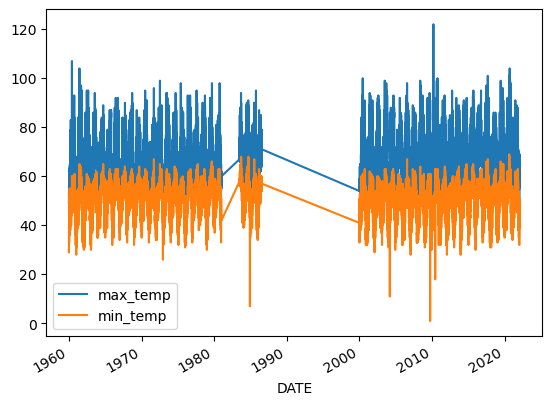

In [21]:
core_elements[['max_temp','min_temp']].plot()

In [23]:
core_elements.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    364
2022     28
Name: DATE, dtype: int64

<AxesSubplot:xlabel='DATE'>

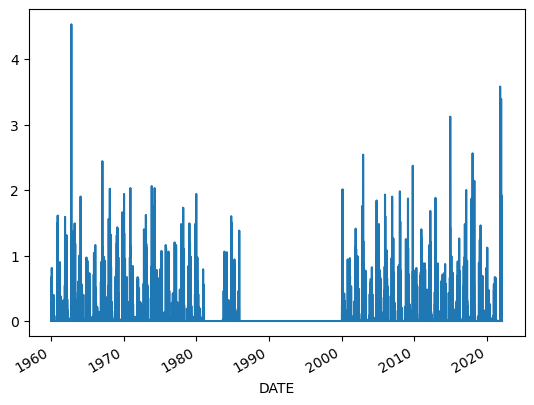

In [24]:
core_elements['precipitation'].plot()

In [26]:
core_elements.groupby(core_elements.index.year).sum()

,precipitation,max_temp,min_temp
DATE,,,
1960,14.01,24135.0,17973.0
1961,13.87,24202.0,17819.0
1962,22.47,23785.0,17880.0
1963,19.11,23470.0,18237.0
1964,16.83,23013.0,18637.0
1965,16.32,23181.0,18715.0
1966,13.11,23680.0,18991.0
1967,23.98,23433.0,18668.0
1968,17.19,23634.0,18859.0


In [27]:
core_elements['target'] = core_elements.shift(-1)['max_temp']

core_elements

,precipitation,max_temp,min_temp,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [30]:
core_elements = core_elements.iloc[:-1].copy()

In [31]:
core_elements

,precipitation,max_temp,min_temp,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


In [36]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1)

In [32]:
predictors = ['precipitation','max_temp','min_temp']

train = core_elements.loc[:'2020-12-31']

test = core_elements.loc['2021-01-01':]

In [37]:
model.fit(train[predictors],train['target'])

Ridge(alpha=0.1)

In [38]:
predictions = model.predict(test[predictors])


In [41]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(test['target'],predictions)

3.4111699434528306

In [44]:
combined_df = pd.concat([test['target'],pd.Series(predictions,index=test.index)],axis=1)

combined_df.columns = ['actual','predicted']
combined_df

,actual,predicted
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-01-23,60.0,59.985714
2022-01-24,57.0,59.626333
2022-01-25,57.0,58.181680


<AxesSubplot:xlabel='DATE'>

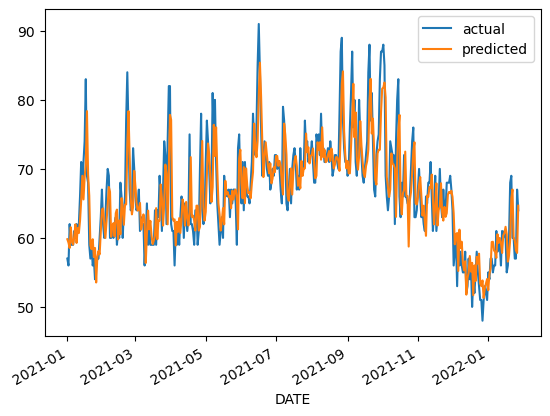

In [45]:
combined_df.plot()

In [46]:
model.coef_

array([-2.20730384,  0.72113834,  0.17969047])

In [47]:
def create_predict(predictors,core_elements,model):
    model = Ridge(alpha=0.1)
    
    predictors = ['precipitation','max_temp','min_temp']

    train = core_elements.loc[:'2020-12-31']

    test = core_elements.loc['2021-01-01':]
    model.fit(train[predictors],train['target'])
    predictions = model.predict(test[predictors])
    combined_df = pd.concat([test['target'],pd.Series(predictions,index=test.index)],axis=1)

    combined_df.columns = ['actual','predicted']
    
    error = mean_absolute_error(test['target'],predictions)
    
    return error,combined_df


In [49]:
create_predict(predictors,core_elements,model)

(3.4111699434528306,
             actual  predicted
 DATE                         
 2021-01-01    57.0  59.806024
 2021-01-02    56.0  59.310181
 2021-01-03    62.0  58.538685
 2021-01-04    59.0  61.531814
 2021-01-05    59.0  59.444266
 ...            ...        ...
 2022-01-23    60.0  59.985714
 2022-01-24    57.0  59.626333
 2022-01-25    57.0  58.181680
 2022-01-26    67.0  57.822299
 2022-01-27    64.0  64.674302
 
 [391 rows x 2 columns])

In [58]:
core_elements['month_mean'] =core_elements['max_temp'].rolling(30).mean()

core_elements

,precipitation,max_temp,min_temp,target,helqp,month_mean
DATE,,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN,NaN
1960-01-02,0.0,49.0,29.0,54.0,29.5,NaN
1960-01-03,0.0,54.0,35.0,54.0,32.0,NaN
1960-01-04,0.0,54.0,36.0,55.0,35.5,NaN
1960-01-05,0.0,55.0,33.0,53.0,34.5,NaN
...,...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,42.5,56.900000
2022-01-24,0.0,60.0,39.0,57.0,40.0,57.066667
2022-01-25,0.0,57.0,43.0,57.0,41.0,57.200000


In [61]:
core_elements['month_day_ratio'] = core_elements['month_mean']/core_elements['max_temp']

del core_elements['helqp']

core_elements

,precipitation,max_temp,min_temp,target,month_mean,month_day_ratio
DATE,,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN,NaN
...,...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000,0.948333
2022-01-24,0.0,60.0,39.0,57.0,57.066667,0.951111
2022-01-25,0.0,57.0,43.0,57.0,57.200000,1.003509


In [62]:
core_elements['max_min_ratio'] = core_elements['max_temp']/core_elements['min_temp']
core_elements

,precipitation,max_temp,min_temp,target,month_mean,month_day_ratio,max_min_ratio
DATE,,,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN,NaN,1.633333
1960-01-02,0.0,49.0,29.0,54.0,NaN,NaN,1.689655
1960-01-03,0.0,54.0,35.0,54.0,NaN,NaN,1.542857
1960-01-04,0.0,54.0,36.0,55.0,NaN,NaN,1.500000
1960-01-05,0.0,55.0,33.0,53.0,NaN,NaN,1.666667
...,...,...,...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0,56.900000,0.948333,1.463415
2022-01-24,0.0,60.0,39.0,57.0,57.066667,0.951111,1.538462
2022-01-25,0.0,57.0,43.0,57.0,57.200000,1.003509,1.325581


In [67]:
predictors=['precipitation','max_temp','min_temp','month_mean','month_day_ratio','max_min_ratio']

predictors

['precipitation',
 'max_temp',
 'min_temp',
 'month_mean',
 'month_day_ratio',
 'max_min_ratio']

In [68]:
core_elements = core_elements.iloc[30:,].copy()

core_elements

,precipitation,max_temp,min_temp,target,month_mean,month_day_ratio,max_min_ratio
DATE,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571
...,...,...,...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0,56.900000,0.948333,1.463415
2022-01-24,0.00,60.0,39.0,57.0,57.066667,0.951111,1.538462
2022-01-25,0.00,57.0,43.0,57.0,57.200000,1.003509,1.325581


In [70]:
error,combined = create_predict(predictors,core_elements,model)

combined
print(error)

3.4112110348048845


<AxesSubplot:xlabel='DATE'>

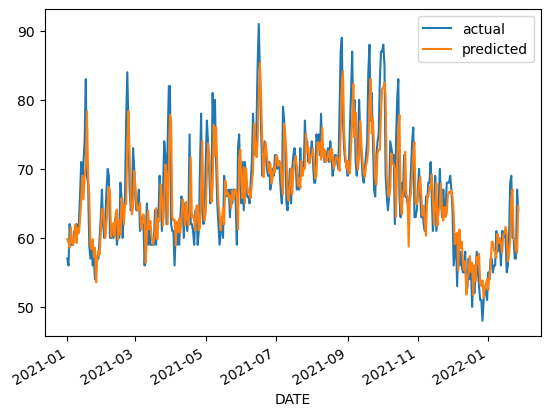

In [71]:
combined.plot()